# Hands-on Exercise for Module 1: Exploratory Data Analysis

### 0.Importing important packages

In [1]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import statistics as st

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            

### 1. Loading data, determining samples, attributes, and types of attributes

Use Davis dataset avaialble at the url https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv
    
Description of the data is provided at http://math.furman.edu/~dcs/courses/math47/R/library/car/html/Davis.html

Drop rows in the data set with missing values (NA), using dropna(inplace=True) function.

<span style="color:red">**Question 1a:** </span> Based on the data description, ware the data points and what are the attributes in this data? <br>

<span style="color:green">Answer: Dataframe is 200*5 matrix. There are 200 instances/data points in this matrix consisting of 5 attributes each, i.e. sex(categorical nominal), weight(numeric real), height(numeric real), reported weight(numeric discrete) and reported height(numeric discrete).  </span> 

<span style="color:red">**Question 1b:** </span> Who are selected as subjects in the study? <br>

<span style="color:green">Answer: The subjects were men and women engaged in regular exercise</span> 

<span style="color:red">**Question 1c:** </span> How many data points are in this dataset? <br>

In [2]:
davis_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv')

In [3]:
davis_df.dropna(inplace=True);

In [4]:
davis_df.shape

(181, 6)

 <span style="color:green">Answer: Originally there were 200 data points, but after dropping the missing values (NA) data points, it comes down to 181.</span>

<span style="color:red">**Question 1d:** </span> How many attributes are in this dataset? <br>

 <span style="color:green">Answer There are 5 attributes (sex, weight, height, reported weight, reported height) ():</span>

<span style="color:red">**Question 1e:** </span> What type of attributes are present in the dataset? <br> 
       

In [5]:
davis_df.dtypes

Unnamed: 0      int64
sex            object
weight          int64
height          int64
repwt         float64
repht         float64
dtype: object

 <span style="color:green">Answer: sex(categorical nominal), weight(numeric discrete), height(numeric discrete), reported weight(numeric real) and reported height(numeric real) </span>
 

### 2. Generating summary statistics

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

In [6]:
davis_df.drop(columns=davis_df.columns[davis_df.columns.str.contains('unnamed', case=False)], inplace=True)
davis_df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


<span style="color:red">**Question 2a:** </span> What are range of values the numeric attributes take? <br> 
[Hint: Use exclude=object option in describe() function to ignore the attribute sex]

In [7]:
davis_df.describe(exclude=[object])

,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000
mean,66.303867,170.154696,65.679558,168.657459
std,15.340992,12.312069,13.834220,9.394668
min,39.000000,57.000000,41.000000,148.000000
25%,56.000000,164.000000,55.000000,161.000000
50%,63.000000,169.000000,63.000000,168.000000
75%,75.000000,178.000000,74.000000,175.000000
max,166.000000,197.000000,124.000000,200.000000


 <span style="color:green">Answer: Numeric data is between 39.000000 and 200.000000</span>

<span style="color:red">**Question 2b:** </span> What different values do categorical attributes take? <br> 
[Hint: Use include=object option in describe() function to ignore the attribute sex]

In [8]:
davis_df.describe(include=[object])

,sex
count,181
unique,2
top,F
freq,99


 <span style="color:green">Answer: There are 2 different values for categorical data. Top frequent value is F(99/181) and another one is M(82/181).</span> 

<span style="color:red">**Question 2c:** </span> What are the mean values for each of the numeric attributes? <br> 

In [9]:
from pandas.api.types import is_numeric_dtype

for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % davis_df[col].mean())

weight:
	 Mean = 66.30
height:
	 Mean = 170.15
repwt:
	 Mean = 65.68
repht:
	 Mean = 168.66


<span style="color:red">**Question 2d:** </span> What is the variance for each of the numeric attributes? <br> 

In [10]:
from pandas.api.types import is_numeric_dtype

for col in davis_df.columns:
    if is_numeric_dtype(davis_df[col]):
        print('%s:' % (col))
        print('\t Variance = %.2f' % davis_df[col].var())   

weight:
	 Variance = 235.35
height:
	 Variance = 151.59
repwt:
	 Variance = 191.39
repht:
	 Variance = 88.26


<span style="color:red">**Question 2e:** </span> Visually examine how the attribute 'weight' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


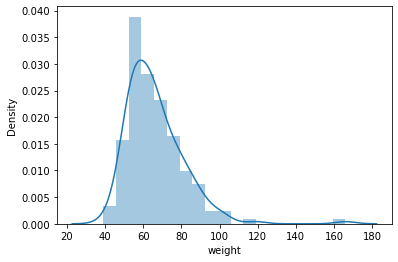

In [11]:
sns.distplot(davis_df['weight']);

 <span style="color:green">Answer: Above shown graph is not a Gaussian distribution, nor uniform distribution as it not symmetrical or rectangle shaped. It is a type of Right Skewed Distribution with a long right tail.</span> 

<span style="color:red">**Question 2f:** </span> Visually examine how the attribute 'height' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


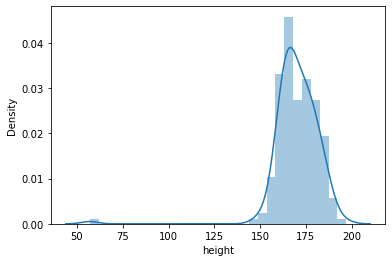

In [12]:
sns.distplot(davis_df['height']);

 <span style="color:green">Answer: Above shown graph is not a Gaussian distribution, nor uniform distribution as it not symmetrical or rectangle shaped. It is a type of Left-Skewed Distribution with a long left tail.</span>  

<span style="color:red">**Question 2g:** </span> Visually examine how the attribute 'repwt' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


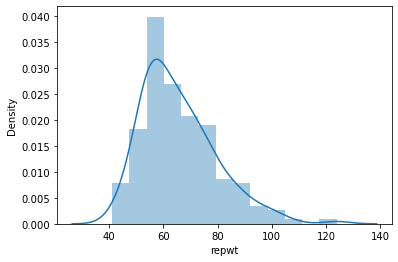

In [13]:
sns.distplot(davis_df['repwt']);

 <span style="color:green">Answer: Above shown graph is not a Gaussian distribution, nor uniform distribution as it not symmetrical or rectangle shaped. It is a type of Non-Gaussian distribution or Skewed Distribution.</span>  

<span style="color:red">**Question 2h:** </span> Visually examine how the attribute 'repht' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


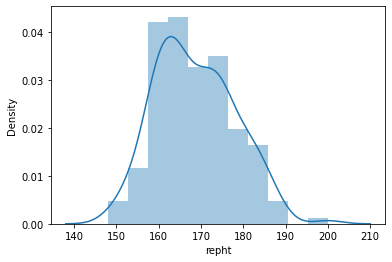

In [14]:
sns.distplot(davis_df['repht']);

 <span style="color:green">Answer:  Above shown graph is not a Gaussian distribution, nor uniform distribution as it not symmetrical or rectangle shaped. It is a type of Non-Gaussian distribution.</span>  

<span style="color:red">**Question 2i:** </span> Visually examine how the attribute 'sex' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution? 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


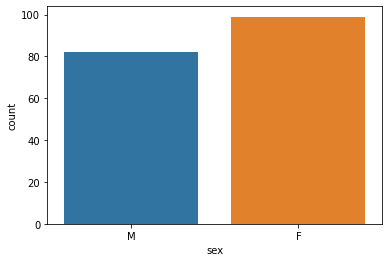

In [15]:
sns.countplot(davis_df['sex']);

 <span style="color:green">Answer: Above shown graph is not a uniform distribution, as all the classes are not having exactly same number of data points.</span>  

<span style="color:red">**Question 2j:** </span> Is it possible for attribute 'sex' to follow a Gaussian distribution? Support your answer with a rationale. 

 <span style="color:green">Answer: No, it is not possible for attribute 'sex' to follow a Gaussian distribution, as normal distribution makes sense if we're dealing with continuous data over real line. </span>

### 3. Geometric and Probabilistic view

<span style="color:brown">**Note:** </span> For this part, we will restrict to 'repwt' and 'repht' attributes in the davis dataset as we can only visualize 2D space.

In [16]:
davis_df_new = davis_df[['repwt','repht']]

In [17]:
davis_df_new.head()

,repwt,repht
0,77.0,180.0
1,51.0,159.0
2,54.0,158.0
3,70.0,175.0
4,59.0,155.0


<span style="color:red">**Question 3a:** </span> Show the Geometric view of this data 'davis_df_new' on a 2D space along with the mean. 

<AxesSubplot:xlabel='repwt', ylabel='repht'>

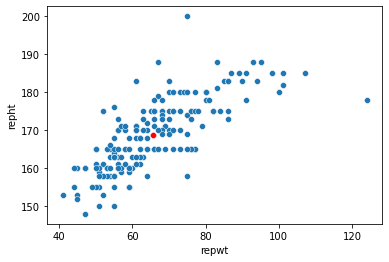

In [18]:
fig, ax = plt.subplots()
sns.scatterplot(x='repwt',y='repht',data=davis_df_new,ax=ax)
mu = np.mean(davis_df_new.values,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

In [19]:
mu

array([ 65.67955801, 168.65745856])

<span style="color:red">**Question 3b:** </span> From the geometric view, state your observations about the data and any relationships you observe between the attributes. 

<span style="color:green">Answer: Mean of the whole dataset is at point(65.67955801, 168.65745856). Data is having postive co-variance. Also, there is a linear relationship between repwt and repht, which is positive in manner except some outliers. Correlation between both the attributes turns out to be 1. </span>

We will further normalize the magnitude of each row in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_row_norm.

In [20]:
from sklearn.preprocessing import normalize
davis_df_new_row_norm = normalize(davis_df_new, axis=1, norm='l2')

In [21]:
davis_df_new_row_norm[1:10,:]

array([[0.30542755, 0.95221532],
       [0.32340548, 0.94626048],
       [0.37139068, 0.92847669],
       [0.35574458, 0.93458322],
       [0.41835989, 0.90828134],
       [0.42288547, 0.90618314],
       [0.37582461, 0.92669081],
       [0.37595091, 0.92663958],
       [0.35232976, 0.93587592]])

In [22]:
davis_df_new_row_norm[:, :]

array([[0.39330275, 0.91940902],
       [0.30542755, 0.95221532],
       [0.32340548, 0.94626048],
       [0.37139068, 0.92847669],
       [0.35574458, 0.93458322],
       [0.41835989, 0.90828134],
       [0.42288547, 0.90618314],
       [0.37582461, 0.92669081],
       [0.37595091, 0.92663958],
       [0.35232976, 0.93587592],
       [0.39582935, 0.91832409],
       [0.32491761, 0.94574233],
       [0.31261835, 0.94987882],
       [0.3616281 , 0.93232243],
       [0.33559036, 0.94200802],
       [0.37139068, 0.92847669],
       [0.47918451, 0.8777142 ],
       [0.3517451 , 0.93609582],
       [0.35112344, 0.93632918],
       [0.33598745, 0.94186646],
       [0.57160461, 0.8205292 ],
       [0.33773899, 0.94123981],
       [0.35644445, 0.93431652],
       [0.38074981, 0.9246781 ],
       [0.33135088, 0.9435076 ],
       [0.2900074 , 0.9570244 ],
       [0.34129379, 0.93995667],
       [0.35112344, 0.93632918],
       [0.25884127, 0.96591987],
       [0.48564293, 0.87415728],
       [0.

<span style="color:red">**Question 3c:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. 

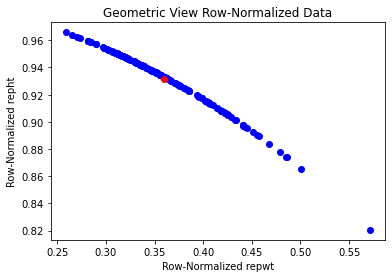

(0.35932096133454006, 0.9315809207391423)

In [23]:
plt.scatter(davis_df_new_row_norm[:, 0], davis_df_new_row_norm[:, 1], color='blue')
plt.scatter(np.mean(davis_df_new_row_norm[:, 0]), np.mean(davis_df_new_row_norm[:, 1]), color='red')
plt.title('Geometric View Row-Normalized Data')
plt.xlabel('Row-Normalized repwt')
plt.ylabel('Row-Normalized repht')
plt.show()
mu=(st.fmean((davis_df_new_row_norm[:, 0])), st.fmean((davis_df_new_row_norm[:, 1]))) #Mean Calculation Using statistics library
mu

 <span style="color:green">Answer: The mean of the normalized repwt and repht is at (0.35932096133454006, 0.9315809207391423).</span> 

<span style="color:red">**Question 3d:** </span> Comment on the new geomateric view of the data in comparison to the view you observed in Question 3b. Provide a reason for the difference in the two geometric views.

 <span style="color:green">Answer: The new view of repwt and repht is different from data in question 3b because all the data points are normalized in the range of values 0 & 1. When the data is normalized we get to know that as repwt increases repht decreases. It is negatively correlated.</span> 

<span style="color:red">**Question 3e:** </span> Show the Probabilistic view of the data davis_df_new.

In [24]:
from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new.values,0)
Sigma1 = np.cov(davis_df_new.values.transpose())

min_length = np.min(davis_df_new.values[:,0]);
min_width = np.min(davis_df_new.values[:,1]);
max_length = np.max(davis_df_new.values[:,0]);
max_width = np.max(davis_df_new.values[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma1)
Z = F.pdf(positions)

Text(0.5, 1.0, 'Probabilistic view')

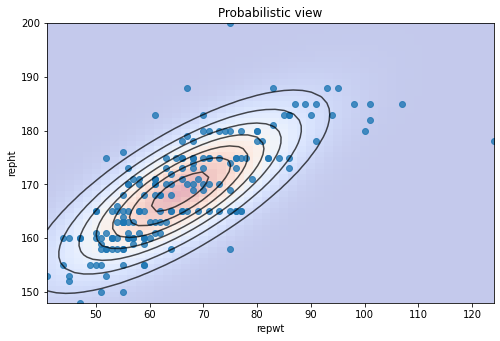

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='k', alpha=0.7)
plt.scatter(davis_df_new.values[:,0],davis_df_new.values[:, 1],alpha=0.8)
ax.set_xlabel('repwt')
ax.set_ylabel('repht')
plt.title('Probabilistic view')

In [26]:
Sigma1 #Covairance Matrix

array([[191.38563536,  99.01740331],
       [ 99.01740331,  88.25979128]])

We will normalize the magnitude of each column in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_col_norm.

In [27]:
davis_df_new_col_norm = normalize(davis_df_new, axis=0, norm='l2')

In [28]:
davis_df_new_col_norm[1:10,:]

array([[0.05648398, 0.06996539],
       [0.05980657, 0.06952536],
       [0.07752703, 0.07700594],
       [0.06534421, 0.06820526],
       [0.08417221, 0.0726056 ],
       [0.08527974, 0.0726056 ],
       [0.08084962, 0.07920611],
       [0.07863456, 0.07700594],
       [0.07088186, 0.07480577]])

<span style="color:red">**Question 3f:** </span> Show the Probabilistic view of the data davis_df_new_col_norm. 

In [29]:
d = davis_df_new_col_norm
df1 = pd.DataFrame(d)

from scipy.stats import multivariate_normal

mu = np.mean(df1.values,0)
Sigma = np.cov(df1.values.transpose())

min_length = np.min(df1.values[:,0]);
min_width = np.min(df1.values[:,1]);
max_length = np.max(df1.values[:,0]);
max_width = np.max(df1.values[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(positions)

Text(0.5, 1.0, 'Probabilistic view - Column Normalized Data')

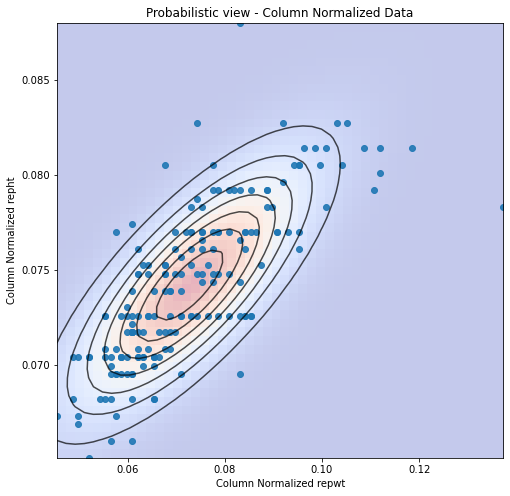

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], aspect='auto', alpha=0.3)
cset = ax.contour(x, y, Z, colors='k', alpha=0.7)
plt.scatter(df1.values[:,0],df1.values[:, 1],alpha=0.9)
ax.set_xlabel('Column Normalized repwt')
ax.set_ylabel('Column Normalized repht')
plt.title('Probabilistic view - Column Normalized Data')

<span style="color:red">**Question 3g:** </span> Compare the shape of the covariance structure in Question 3f with that of Question 3e and comment if column normalization has affected the shape of the covariance structure.

In [31]:
Sigma #Column Normalized Covariance Matrix

array([[2.34757565e-04, 4.82561662e-05],
       [4.82561662e-05, 1.70897301e-05]])

<span style="color:green">Answer: Yes, column normalization has affected the shape of covariance matrix as all the values are normalized to 1. But, the covariances along both the attributes are same as before, only the shape is changed due to normalization.</span>  

### 4. Understanding the (in)dependencies among attributes using Covariance matrix

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

<span style="color:red">**Question 4a:** </span> Compute the covariance matrix.

In [32]:
data = davis_df.values[:,1:5]
data[1:10,:]

array([[58, 161, 51.0, 159.0],
       [53, 161, 54.0, 158.0],
       [68, 177, 70.0, 175.0],
       [59, 157, 59.0, 155.0],
       [76, 170, 76.0, 165.0],
       [76, 167, 77.0, 165.0],
       [69, 186, 73.0, 180.0],
       [71, 178, 71.0, 175.0],
       [65, 171, 64.0, 170.0]], dtype=object)

In [33]:
len(data)

181

In [34]:
mu=np.mean(data, axis=0)
mu

array([66.30386740331491, 170.15469613259668, 65.67955801104972,
       168.65745856353593], dtype=object)

In [35]:
def mycov(data, col_a, col_b):
    mu = np.mean(data, axis=0) #compute mean
    sum = 0;
    for i in range(0, len(data)):
        sum += ((data[i,col_a] - mu[col_a]) * (data[i,col_b] - mu[col_b]))

    return sum/(len(data)-1)

a=[];

for i in range(0, 4):
    for j in range(0, 4):
        b = mycov(data, i, j)
        a.append(b)
    print(str(a)+'\n')
    a=[]

[235.34604051565367, 29.136065070595443, 177.2923572744014, 91.00466543891957]

[29.136065070595443, 151.5870472682623, 102.83317986494785, 85.4977286678944]

[177.2923572744014, 102.83317986494785, 191.3856353591161, 99.0174033149171]

[91.00466543891957, 85.4977286678944, 99.0174033149171, 88.25979128299568]



In [36]:
print('Covariance:')
davis_df.cov()

Covariance:


,weight,height,repwt,repht
weight,235.346041,29.136065,177.292357,91.004665
height,29.136065,151.587047,102.833180,85.497729
repwt,177.292357,102.833180,191.385635,99.017403
repht,91.004665,85.497729,99.017403,88.259791


<span style="color:red">**Question 4b:** </span> Which pairs of attributes co-vary in the opposite direction?

<span style="color:green">Answer: None of the pairs of attributes co-vary in opposite direction </span> 



<span style="color:red">**Question 4c:** </span> Compute the correlation matrix.

In [37]:
print('Correlation:')
davis_df.corr()

Correlation:


,weight,height,repwt,repht
weight,1.000000,0.154258,0.835376,0.631435
height,0.154258,1.000000,0.603737,0.739166
repwt,0.835376,0.603737,1.000000,0.761860
repht,0.631435,0.739166,0.761860,1.000000


<span style="color:red">**Question 4d:** </span> Which pairs of attributes are highly correlated? Clearly specify the highly positive and highly negatively correlated attributes.

<span style="color:green">Answer:  Highly correlated pairs listed in decreasing order of correlation.

weight, repwt (0.835376) Highly Positive

repwt, repht (0.761860) Highly Positive

repht, height (0.739166) Strongly Positive

repht, weight (0.631435) Strongly Positive
    
height, repwt (0.603737) Strongly Positive

weight, height (0.154258) Weakly Positive </span> 


<span style="color:red">**Question 4e:** </span> Which pairs of attributes are uncorrelated?

<span style="color:green">Answer: There are no pairs of attributes in data which are uncorrelated.</span> 

<span style="color:red">**Question 4f:** </span> What information did you gather from a correlation matrix that is not available in a covariance matrix?

<span style="color:green">Answer: Correlation matrix conveys that data is positively linear.</span> 

### 5. Dimensionality Reduction: Feature Selection

**Data:** Iris dataset from the practice notebook. (https://raw.githubusercontent.com/plotly/datasets/master/iris.csv)

**Assumption:** Assume that your goal is to cluster the data to identify the species 'Name'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Name' attribute will be hidden from the clustering algorithm.

In [38]:
import seaborn as sns
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


In [39]:
iris_df.shape

(150, 5)

In [40]:
iris_df.head

<bound method NDFrame.head of      SepalLength  SepalWidth  PetalLength  PetalWidth            Name
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]>

<span style="color:red">**Question 5a:** </span> If you are allowed to select only one attribute, which attribute would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

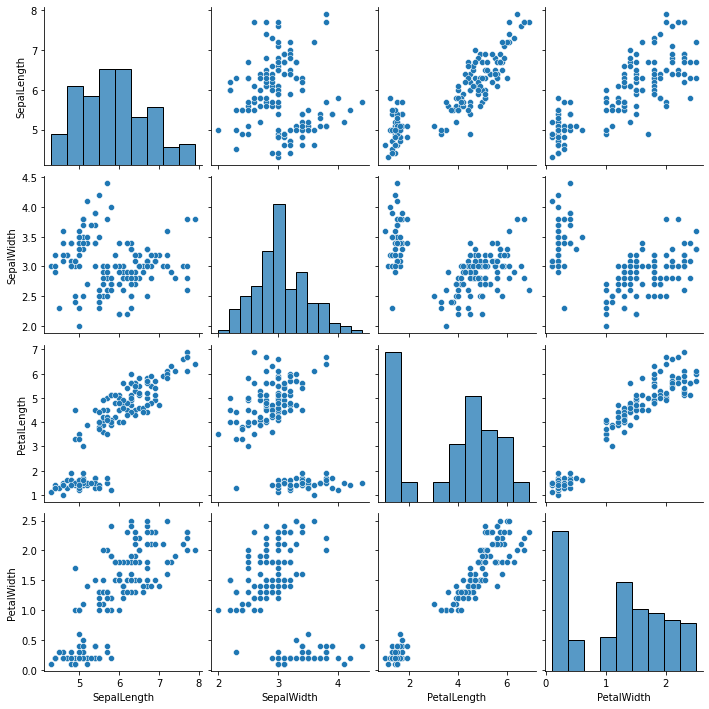

In [41]:
sns.pairplot(iris_df)

<span style="color:green">Answer: Petal Lemgth can be used as single useful attribute for clustering task, because as seen in the pairplot histogram for PetalWidth, it is seperating the classes more successfully than any other attribute and also data points are scattered well to define clusters.</span> 

<span style="color:red">**Question 5b:** </span> If you are allowed to select only two features, which feature would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

<span style="color:green">Answer: Petal Length and Petal Width can be used as two useful attributes for clustering task, as they are seperating the classes together very well than any other attribute pair.</span> 

<span style="color:red">**Question 5c:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **feature selection** in that case? 

<span style="color:green">Answer: Types of iris plants, specifies the label of the plants. If there is no label present for particular database, then prediction for that database can be done using unsupervised machine learning algorithms. We can perfom dimensionality reduction techniques such as PCA, SVD or LDA to get the new features from the existing features and they maybe or may not be the same features.</span> 

### 6. Dimensionality Reduction: PCA on Iris Data

<span style="color:red">**Question 6a:** </span> Perform PCA on Iris dataset and project the data onto the first two principal components. Use the attributes 'SepalLength','SepalWidth','PetalLength', and 'PetalWidth'. 

Hint: Use iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']] to use the specified attributes.

In [42]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']])
print(iris_df.shape)
print(projected.shape) 

(150, 5)
(150, 2)


<span style="color:red">**Question 6b:** </span> Generate a pairplot (along with colors for the different types of iris plants) between the two newly generated features using PCA in the above step.

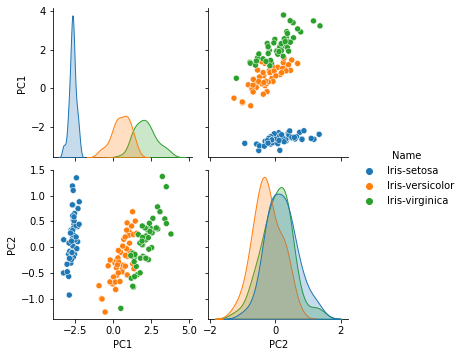

In [43]:
pc=pd.DataFrame(projected,columns=['PC1','PC2'])
pc= pd.concat([pc,iris_df[['Name']]], axis = 1)
sns.pairplot(pc,hue="Name")

<span style="color:red">**Question 6c:** </span> From the above pairplot, if only one newly generated attribute were to be used for clustering the data which newly generated attribute is best suited. Provide a reason. Is the newly generated attribute better than the feature selected in Question 5a?

<span style="color:green">Answer: We select PC1 for clustering the data as the overlap between classes is minimal and covers maximum variance and the newly generated attribute is not better than the feature selected in 5a.</span> 

<span style="color:red">**Question 6d:** </span> From the above pairplot, if two newly generated attributes were to be used for clustering the data, are the two newly generated attributes better than the features selected in Question 5b?

<span style="color:green">Answer: No,the two newly generated attributes are not better.</span> 

<span style="color:red">**Question 6e:** </span> In general, are principal components guaranteed to be more informative than the original features for the data mining task at hand?

<span style="color:green">Answer: No, PCs are not guaranteed to be more informative than the original features, but they capture the same info in the new space.</span> 

<span style="color:red">**Question 6f:** </span>In real-world problems ground-truth (types of iris plants) will not be available to determine if the principal compoents or original features are better suited for the data mining task at hand. How should one proceed with the data mining task?

<span style="color:green">Answer: If the correlation between the attributes is high we can go ahead with PCA or else we can perform feature selection.</span> 

### 7. Dimensionality Reduction: PCA on synthetic datasets

Consider the following synthetic dataset we refer to as **Blobs**. This dataset has 500 data points centered around (-5, -5), (0,0) and (5,5). This dataset has 1500 data points and 2 attributes.

In [44]:
n_samples = 1500
random_state = 42
centers = [(-5, -5), (0, 0), (5, 5)]
Blobs_X, Blobs_y = datasets.make_blobs(n_samples=n_samples,centers=centers,random_state=random_state)

In [45]:
Blobs_X

array([[ 0.16846098,  1.31759754],
       [-3.53435123, -5.2257763 ],
       [-6.52552517, -5.69190807],
       ...,
       [-1.24386324, -0.6929052 ],
       [-0.20902326, -0.85052045],
       [ 4.8053027 ,  4.93581182]])

In [46]:
Blobs_X.shape

(1500, 2)

In [47]:
Blobs_y

array([1, 0, 0, ..., 1, 1, 2])

Text(0.5, 1.0, 'Blobs')

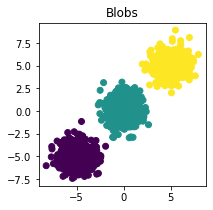

In [48]:
plt.figure(figsize=(3,3))
plt.scatter(Blobs_X[:, 0], Blobs_X[:, 1], c= Blobs_y)
plt.title('Blobs')


We generated a new dataset **Blobs1** by adding an extra attribute to this 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 1.

In [49]:
Blobs1= pd.DataFrame(Blobs_X)
Blobs1['2'] = np.random.randn(1500)
Blobs1.head()

,0,1,2
0,0.168461,1.317598,-1.364193
1,-3.534351,-5.225776,-0.407249
2,-6.525525,-5.691908,-0.231622
3,-0.120948,0.419532,-0.007905
4,-5.469474,-4.457440,-1.463996


We generated a new dataset **Blobs2** by adding an extra attribute to the 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 100. Read more about how to do this at https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html.

In [50]:
Blobs2= pd.DataFrame(Blobs_X)
Blobs2['2'] = np.random.randn(1500)*10
Blobs2.head()

,0,1,2
0,0.168461,1.317598,1.123459
1,-3.534351,-5.225776,-4.937707
2,-6.525525,-5.691908,5.296681
3,-0.120948,0.419532,-17.839019
4,-5.469474,-4.457440,3.685796


We generated a new dataset **Blobs3** by adding two extra attributes to the 2D Blobs dataset. The values for the two new attributes are drawn from a normal distribution with mean 0 and variance 100. 

In [51]:
Blobs3= pd.DataFrame(Blobs_X)
Blobs3['2'] = np.random.randn(1500)*10
Blobs3['3'] = np.random.randn(1500)*10
Blobs3.head()

,0,1,2,3
0,0.168461,1.317598,-7.529859,11.988566
1,-3.534351,-5.225776,-14.753592,-2.525773
2,-6.525525,-5.691908,22.025240,2.923425
3,-0.120948,0.419532,-2.484175,1.128618
4,-5.469474,-4.457440,13.048431,-22.454297


<span style="color:red">**Question 7a:** </span> Plot pairplot for **Blobs1** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

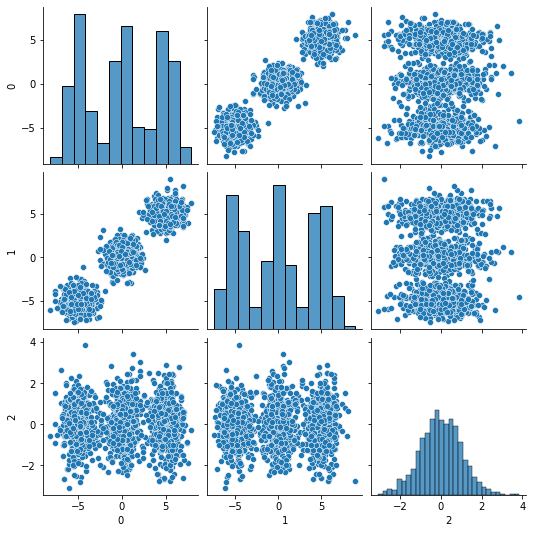

In [52]:
sns.pairplot(Blobs1)

<span style="color:green">Answer: 95% of data from third attribute is between (2, -2) which is very less when compared with other two attributes.</span> 

<span style="color:red">**Question 7b:** </span> Perform PCA on **Blobs1** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [53]:
pca = PCA(2)  # project from 3 to 2 dimensions
projected = pca.fit_transform(Blobs1)
print(Blobs1.shape)
print(projected.shape)   

(1500, 3)
(1500, 2)


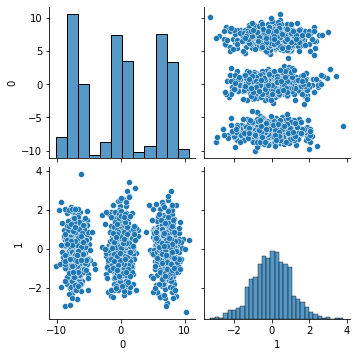

In [54]:
data1 = projected
df = pd.DataFrame(data1)
sns.pairplot(df)

<span style="color:red">**Question 7c:** </span> By comparing the distributions for the newly generated attributes in Question 7b with the previous pairplot in Question 7a, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Provide a reason for your observations.

<span style="color:green">Answer: Attribute 1 is capturing the first principal component and the second principal component is captured by data from thrid column, i.e. the normally distributed random values for mean 0 and variance as 1.</span> 

<span style="color:red">**Question 7d:** </span> Plot pairplot for **Blobs2** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

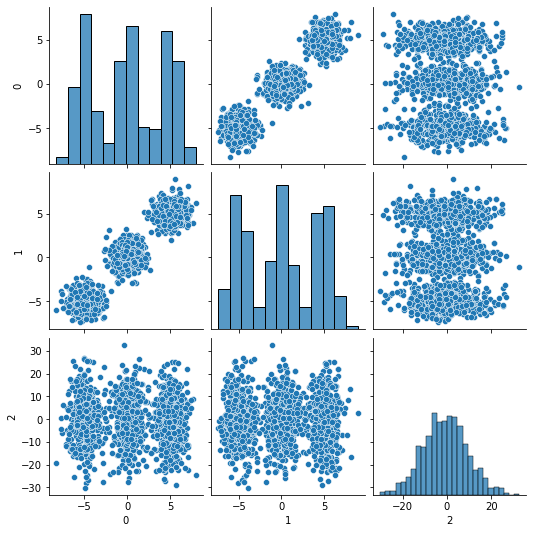

In [55]:
sns.pairplot(Blobs2)

<span style="color:green">Answer:</span> 

<span style="color:red">**Question 7e:** </span> Perform PCA on **Blobs2** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

(1500, 3)
(1500, 2)


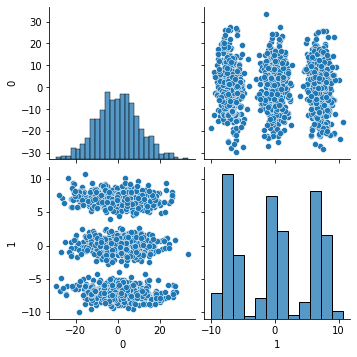

In [56]:
# pca = PCA(2)  # project from 3 to 2 dimensions
projected = pca.fit_transform(Blobs2)
print(Blobs2.shape)
print(projected.shape)
data2 = projected
df = pd.DataFrame(data2)
sns.pairplot(df)

<span style="color:red">**Question 7f:** </span> By comparing the distributions for the newly generated attributes in Question 7e with the previous pairplot in Question 7d, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7c)?

<span style="color:green">Answer: The first principal component is captured by Attribute 2, i.e. the normally distributed random values for men 0 and variance of 100. The second principal component is captured by Attribute 1.</span> 

<span style="color:red">**Question 7g:** </span> Are the three blobs separately visible after projection based on PCA in Question 7e?

<span style="color:green">Answer: Yes, the three blobs are separately visible after plotting.</span> 

<span style="color:red">**Question 7h:** </span> Plot pairplot for **Blobs3** data. By visually examining this plot, comment on the strength of the correlation between the first two attributes. Also, comment on the strength of the correlation between the second two attributes.

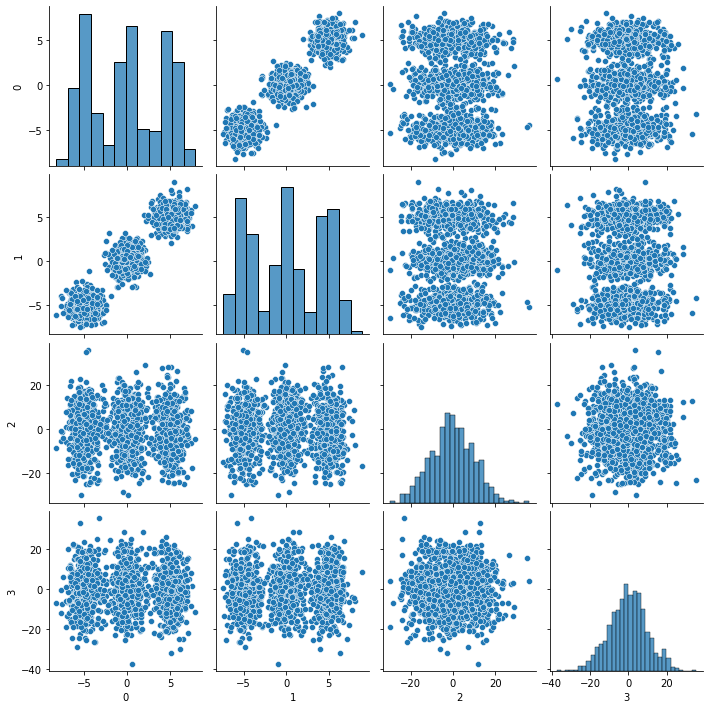

In [57]:
sns.pairplot(Blobs3)

<span style="color:green">Answer: First two attributes are highly positively correlated and last two are non-linear. </span> 

<span style="color:red">**Question 7i:** </span> Perform PCA on **Blobs3** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

(1500, 4)
(1500, 2)


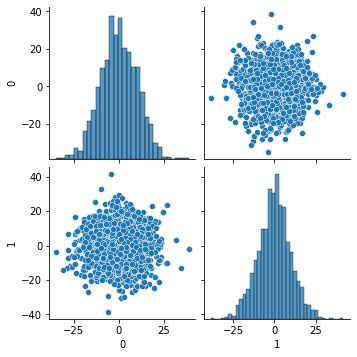

In [58]:
# pca = PCA(2)  # project from 4 to 2 dimensions
projected = pca.fit_transform(Blobs3)
print(Blobs3.shape)
print(projected.shape)
data2 = projected
df = pd.DataFrame(data2)
sns.pairplot(df)

<span style="color:red">**Question 7j:** </span>  By comparing the distributions for the newly generated attributes in Question 7i with the previous pairplot in Question 7h, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7f and 7c)?

<span style="color:green">Answer: PC1 is capturing Attribute 3 and PC2 is capturing Attribute 2.</span> 

<span style="color:red">**Question 7k:** </span>  Are the three blobs separately visible after projection based on PCA in Question 7i? What would have caused this, in comparison to your observation in Question 7g?

<span style="color:green">Answer: No, the three blobs are not separately visible after projection based on PCA in question 7i. This is due to the non-linear data which was generated because of randomly generated values for attribute 3 and 4. The geometric view of that data is circular.</span> 

<span style="color:red">**Question 7l:** </span>  What limitation of PCA do your observations in Questions 7j, 7f, and 7c highlight?

<span style="color:green">Answer: Classification and clustering is not possible with PCA, it only captures the variance of the data.</span>

### 8. Singular Value Decomposition

<span style="color:green"> **(Optional)** </span> <span style="color:red">Question 8a: </span> Using the code provided in the practice notebook for computing PCA, write your own SVD function (U,S,V = mysvd(A)) to factorize the matrix A into U,S, and V.

<span style="color:green"> **(Optional)** </span>  <span style="color:red">Question 8b: </span> Demonstrate that your code is correct by using your function on the following matrix $A$ and showing that the product $USV^T=A$.

In [59]:
A = np.array([
    [1, 1, 1, 0, 0, 0],
    [3, 3, 3, 0, 0, 0],
    [4, 4, 4, 0, 0, 0],
    [5, 5, 5, 0, 0, 0],
    [0, 1, 0, 4, 4, 1],
    [0, 0, 0, 5, 5, 2],
    [0, 0, 0, 2, 2, 2]])

In [60]:
U, S, V = svd(A, full_matrices = False)

<AxesSubplot:>

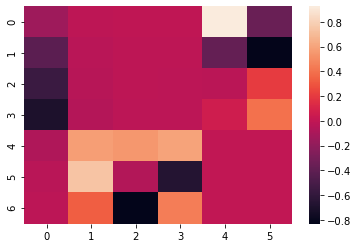

In [61]:
sns.heatmap(U)

<AxesSubplot:>

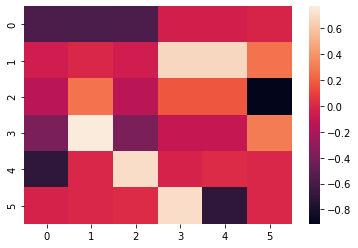

In [62]:
sns.heatmap(V)

<span style="color:red">**Question 8c:**</span> Perform SVD on iris dataset and visualize the proportion of variance captured by each spectral value. List the dimensions that captures less than 10% of the total variance.

In [63]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')


In [64]:
data = iris_df.values[:,0:4]
data = data.astype(float) #converts data format from object to numeric

In [65]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

<AxesSubplot:>

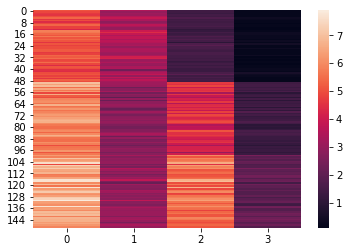

In [66]:
sns.heatmap(data)

In [67]:
U, S, V = svd(data, full_matrices = False)

<AxesSubplot:>

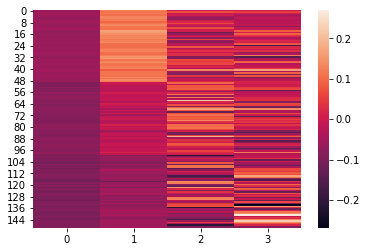

In [68]:
sns.heatmap(U)

<AxesSubplot:>

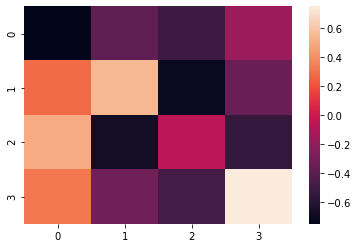

In [69]:
sns.heatmap(V)

In [70]:
S

array([95.95066751, 17.72295328,  3.46929666,  1.87891236])

Text(0, 0.5, 'variance covered')

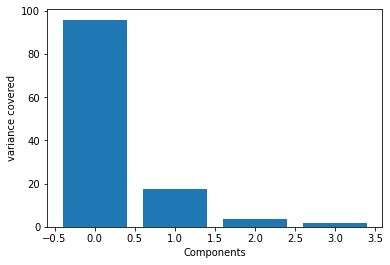

In [71]:
#Variance captured by each spectral value
plt.bar(np.arange(4),S)
plt.xlabel('Components')
plt.ylabel('variance covered')

Text(0, 0.5, 'Cumulative variance covered')

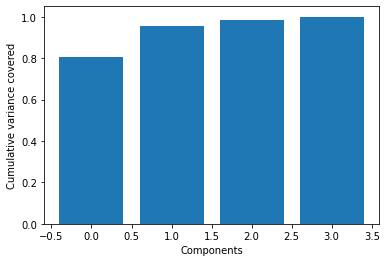

In [72]:
#Cumulative Variance
plt.bar(np.arange(4),np.cumsum(S)/np.sum(S))
plt.xlabel('Components')
plt.ylabel('Cumulative variance covered')

<span style="color:green">Answer: The first spectral values is capturing almost 90% of the variance, second one is capturing around 17% of variance and the last two spectral values are capturing around 3% and 1% respectively. Also, the last two spectral values capture less than 10% of varaince of data.</span> 

<span style="color:red">**Question 8d:**</span> The heatmap of the full data is shown below. Plot all the four spectral decomposition matrices based on SVD.

<AxesSubplot:>

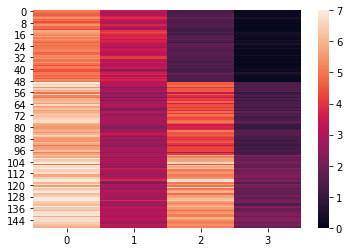

In [73]:
sns.heatmap(data,vmin=0, vmax=7)

<AxesSubplot:>

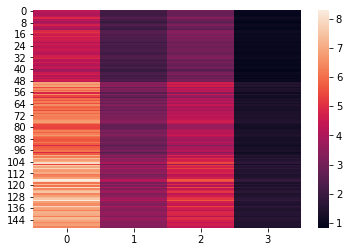

In [74]:
sns.heatmap(S[0]*np.outer(U[:,0],V[0,:]))

<AxesSubplot:>

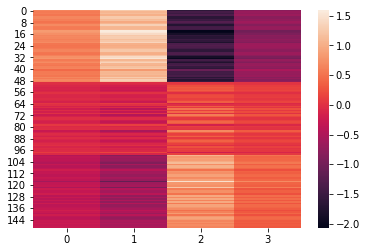

In [75]:
sns.heatmap(S[1]*np.outer(U[:,1],V[1,:]))

<AxesSubplot:>

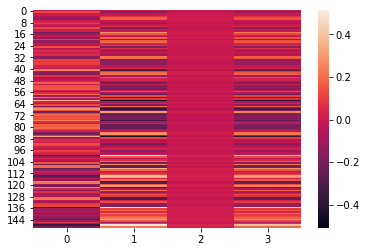

In [76]:
sns.heatmap(S[2]*np.outer(U[:,2],V[2,:]))

<AxesSubplot:>

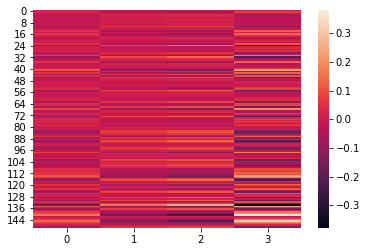

In [77]:
sns.heatmap(S[3]*np.outer(U[:,3],V[3,:]))

<span style="color:red">**Question 8e:**</span> Visually examine the magnitude of values present in each of the four spectral decomposition matrices and comment on which two of the four matrices have elements with relatively small magnitude in them. Provide a reason for this based on your obsevation in Question 8c. 

<span style="color:green">Answer: Last two spectral values...</span> 

### 9. Linear Discriminant Analysis

We will use digits data for studying the use of LDA.

In [78]:
digits = load_digits()

The data with 1797 samples and 64 attributes is in the object digits.data. These 64 attributes represent pixels in an 8x8 image.

In [79]:
digits.data.shape

(1797, 64)

The 1797 images are digits from 0...9. This information is in the digits.target variable.

In [80]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

For this part, we will only focus on digits 3 and 8. To this end, we generate indices of 183 samples with 3s and indices of 174 samples with 8s.

In [81]:
Threes = np.where(digits.target==3)
Eights = np.where(digits.target==8)
[np.size(Threes), np.size(Eights)]

[183, 174]

We will take samples from these indices and construct a matrix X such that the first 183 samples represent 3s and the remaining ones represent 8s. The variable y captures this information.

In [82]:
indices = np.hstack((Threes[0], Eights[0]));
X = digits.data[indices,:]
y = np.hstack((3*np.ones(np.size(Threes)), 8*np.ones(np.size(Eights))))

In [83]:
X

array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       [ 0.,  1.,  8., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [84]:
X.shape

(357, 64)

In [85]:
y

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8.

In [86]:
y.shape

(357,)

<span style="color:red">**Question 9a:**</span> Visually examine the following heatmap of the data X and comment which among attributes 43 and 45 can separate the 3s from 8s better.

[Text(0.5, 69.0, 'Attributes'), Text(159.0, 0.5, 'Samples')]

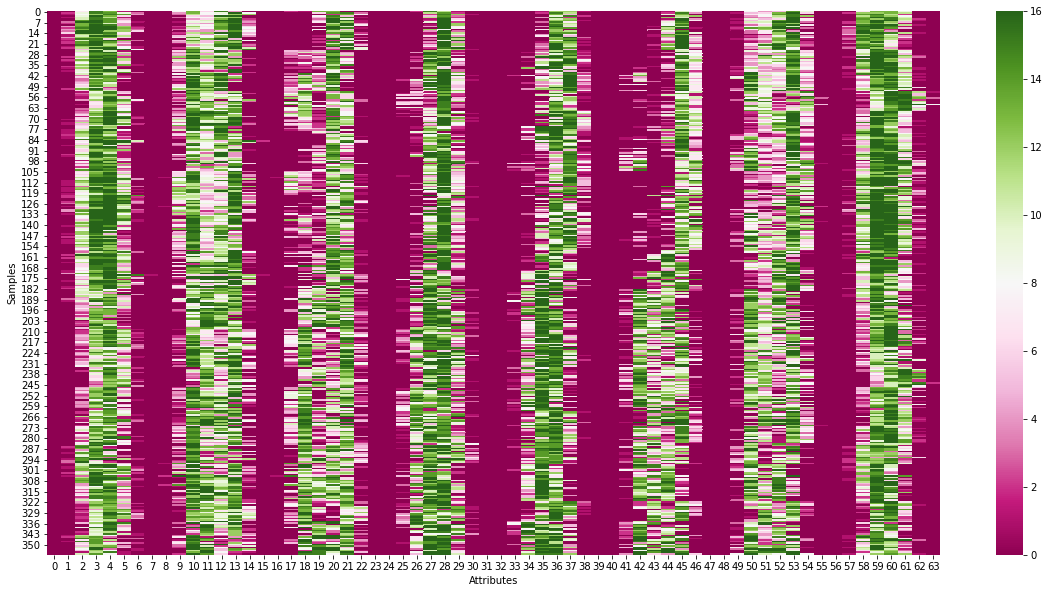

In [87]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')


<span style="color:green">Answer: Attribute 43 can separate the 3s from 8s in more better way.</span>

<span style="color:red">**Question 9b:**</span> Perform LDA on this data. Plot the heatmap of the projected data and comment if the resultant projection is better than the best attribute between 43 and 45.

In [88]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_r1 = lda.fit(X, y).transform(X)

[Text(0.5, 69.0, 'Attributes'), Text(159.0, 0.5, 'Samples')]

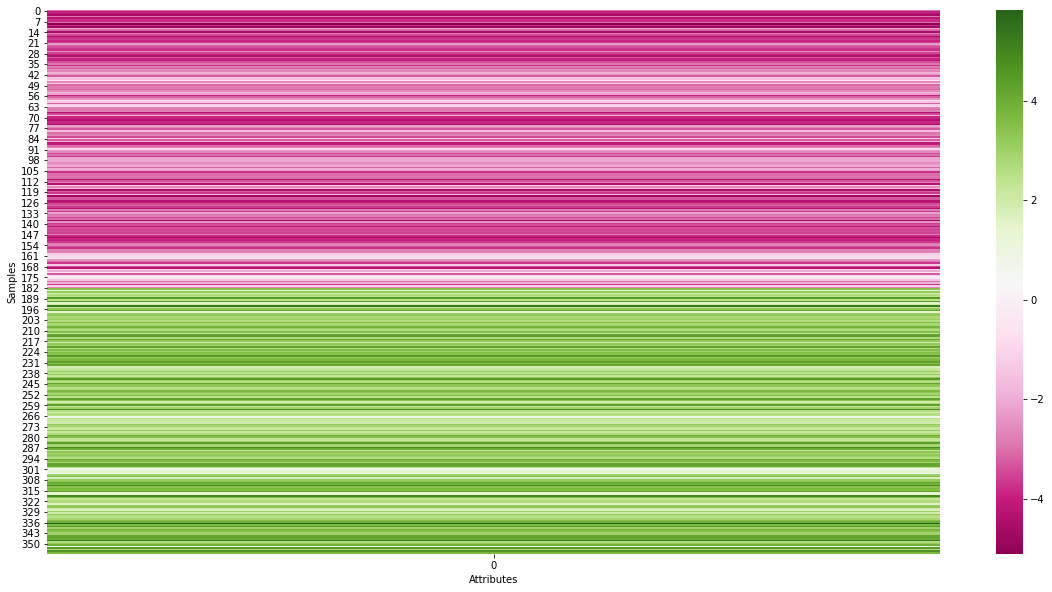

In [89]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X_r1,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

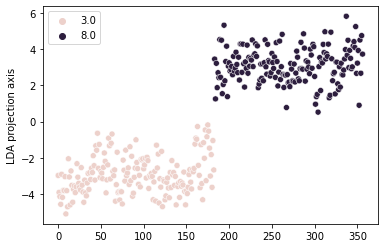

In [90]:
fig = sns.scatterplot(x=np.arange(np.size(X_r1)),y=X_r1[:,0],hue=y)
plt.ylabel('LDA projection axis')
plt.show(fig)

<span style="color:green">Answer: Yes, the resultant projection is better than the best projection i.e. attribute 43</span>